In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os 
import glob

os.chdir(r'D:\datos_GPetersii\datos_GPetersii\Fish3\Object\raw\50fps\B-soid\BSOID')
files = glob.glob('*labels*.csv')

In [58]:
len(files)

48

In [59]:
for i, file in enumerate(files) :
    behav = pd.read_csv(file).iloc[:,1].to_numpy()
    if i == 0 :
        behaviors = np.array(behav)
    else:
        behaviors = np.concatenate((behaviors, behav), axis=0)

behaviors.shape
np.savetxt('behaviorsP3.txt', behaviors)

In [61]:
os.chdir(r'D:\datos_GPetersii\datos_GPetersii\behaviors_histogram')
files = glob.glob('*.txt')
files

['behaviorsP1.txt',
 'behaviorsP4.txt',
 'behaviorsP5.txt',
 'behaviorsP2.txt',
 'behaviorsP6.txt',
 'behaviorsP3.txt',
 'behaviorsP7.txt']

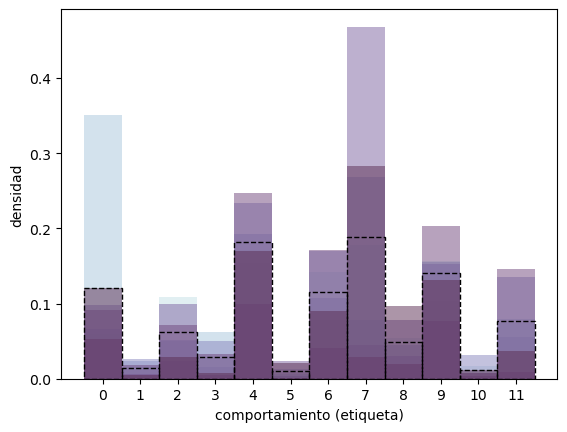

In [92]:
num = 7
cmap = sns.color_palette("ch:s=0.9,r=-0.55", as_cmap=True)
colors = [cmap(i/num) for i in range(num)]
total = []
fig, ax = plt.subplots()
for i, file in enumerate(files):
    behaviors = np.loadtxt(file)
    total += list(behaviors)
    plt.hist(behaviors, density=True, alpha=.5, color=colors[i], bins=np.arange(-.5,12.5, 1))

plt.hist(total, fill= False, edgecolor='k', bins=np.arange(-.5,12.5, 1), density=True, linestyle='--')
ax.set(xticks=np.arange(12), xlabel='comportamiento (etiqueta)', ylabel='densidad')
fig.savefig('histograma_behav.svg', format='svg')